In [ ]:
# In this script we reproduce what was done in:
# Nathalie Raveu et al. “Modal Theory for Waveguides With Anisotropic Surface Impedance Boundaries”. 
# In: IEEE Transactions on Microwave Theory and Techniques 64.4 (2016), pp. 1153–1162. doi: 10.1109/TMTT.2016.2533387

In [15]:
# For easy handling of plots
%matplotlib widget

# Importing modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import fsolve
from scipy.signal import find_peaks
import scipy.constants as sc

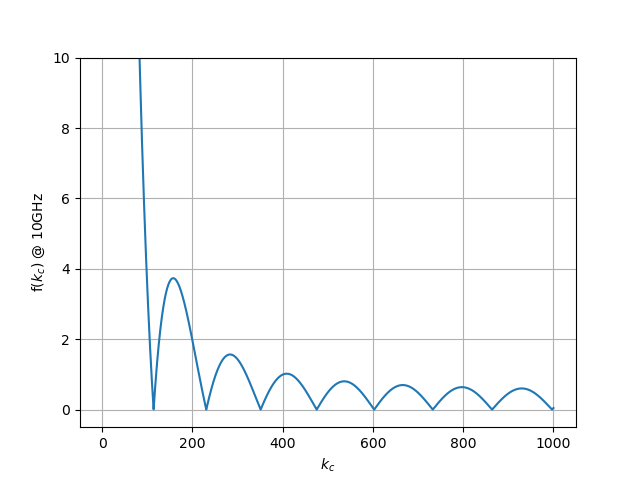

Indexes of zeros: [1133 2300 3506 4749 6024 7323 8639 9967]


In [89]:
# We start with rectangular waveguides and the m=0 modes

# WR90
a = 22.86e-3 # Long side of waveguide
b = 10.16e-3 # Short side of waveguide
# zt = 0
zt = -1j/2

freq = 10e9
omega = 2*np.pi*freq

# Testing the root finding
# The dispersion equation (64) i.e. m = 0
def f_of_kc(kc):

    k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)
    X = np.exp(-1j*2*kc*a, dtype = complex)
    
    f = np.abs(zt**2*(1-X) - 2*k0/kc*zt*(1+X) + (k0/kc)**2 * (1-X))

    return f

# Plotting

x = np.linspace(1, 1000, 10000)
fig, ax = plt.subplots()
ax.plot(x, f_of_kc(x))

ax.set_ylabel("f($k_c$) @ 10GHz")
ax.set_xlabel("$k_c$")

ax.set_ylim(-0.5, 10)
plt.grid(True)
plt.show()

# The issue here is to find all possible zeros and to place them correctly into a matrix
# The root finding algorithm was not working as I would have liked. Another idea
# would be using the peak finding:

# Find the zeros as peaks: n.b. The "-" is mandatory, since it defines as peaks
# the zeros (thanks to the abs)
kcs = find_peaks(-f_of_kc(x)) 

# The idexes of the zeros are:
print(f'Indexes of zeros: {kcs[0]}')

# Add to the plot to see
for i in kcs[0]:
    ax.scatter(x[i], f_of_kc(x)[i])

# The issue with this method is that we need to have enough resolution nearby
# the peaks to be able to "see" them...


In [90]:
# Root finding for f(kc) (OLD)

# For m = 0
# Defining a freqeuncy array
freq = np.geomspace(1e6, 2e10, 1001)
omega = 2*np.pi*freq

# Predefining kc, we look for one kc per each frequency point.
# In truth we need another dimension that is n (i.e. for each frequency, the first zero is n=0, the second n=1...)
kc = np.zeros_like(omega)

for idx, w in enumerate(omega):

    # I have to define the function again, otherwise it does not recognize omega
    # The dispersion equation (64)
    def f_of_kc(kc):

        k0 = w*np.sqrt(sc.epsilon_0*sc.mu_0)

        X = np.exp(-1j*2*kc*a, dtype = complex)

        f = np.abs(zt**2*(1-X) - 2*k0/kc*zt*(1+X) + (k0/kc)**2 * (1-X))
        
        return f
    
    root = fsolve(f_of_kc, 1)
    kc[idx] = root

# Very bad, instead of checking for all the roots of the equation, we just assume they are integer multiples
# Not nice, but working.

n = 1 # Mode number
kc = np.array(kc)*(n)
display(kc)

k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)

gamma = np.sqrt(kc**2 - k0**2, dtype=complex)

eps_eff = (np.imag(gamma)/k0)**2


array([  1.91485894,   1.92436282,   1.93391385, ..., 124.29597358,
       124.41155785, 124.52625612])

In [106]:
# Root finding for f(kc) (NEW 10/01/2024)

# WR90
a = 22.86e-3 # Long side of waveguide
b = 10.16e-3 # Short side of waveguide
zt = 0
# zt = -1j/2

# For m = 0
# Defining a freqeuncy array
freq = np.geomspace(1e6, 2e10, 1001)
omega = 2*np.pi*freq

# Predefining kc, we look for one kc per each frequency point.
# In truth we need another dimension that is n (i.e. for each frequency, the first zero is n=0, the second n=1...)
# kc = np.zeros_like(omega)

# This is the number of zeros (i.e. the index n) that I will be looking for
n_modes = 3
kc = np.zeros([len(omega), n_modes])
display(kc)

for idx, w in enumerate(omega):

    # I have to define the function again, otherwise it does not recognize omega
    # The dispersion equation (64)
    def f_of_kc(kc):

        k0 = w*np.sqrt(sc.epsilon_0*sc.mu_0)

        X = np.exp(-1j*2*kc*a, dtype = complex)

        f = np.abs(zt**2*(1-X) - 2*k0/kc*zt*(1+X) + (k0/kc)**2 * (1-X))
        
        return f
    
    # Find the zeros as peaks
    # I need to define a kc array (which gives the resolution of the peak finding)
    x = np.linspace(1, 1000, 10000) # Hard coded, NOT NICE!
    
    roots_idx = find_peaks(-f_of_kc(x))[0]
    roots = x[roots_idx]

    # kc is a matrix of len(omega) rows and 3 columns (n=0, n=1, n=2)
    kc[idx] = roots[:n_modes]

display(kc)
n = 1 # Mode number

# Final computations for dispersion curves
k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)
# But I am computing more modes, I need a matrix
k0 = np.tile(k0, (n_modes, 1)).T

gamma = np.sqrt(kc**2 - k0**2, dtype=complex)

eps_eff = (np.imag(gamma)/k0)**2

display(kc[:, 0])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

array([[137.4770477 , 274.85328533, 412.32943294],
       [137.4770477 , 274.85328533, 412.32943294],
       [137.4770477 , 274.85328533, 412.32943294],
       ...,
       [137.4770477 , 274.85328533, 412.32943294],
       [137.4770477 , 274.85328533, 412.32943294],
       [137.4770477 , 274.85328533, 412.32943294]])

array([137.4770477, 137.4770477, 137.4770477, ..., 137.4770477,
       137.4770477, 137.4770477])

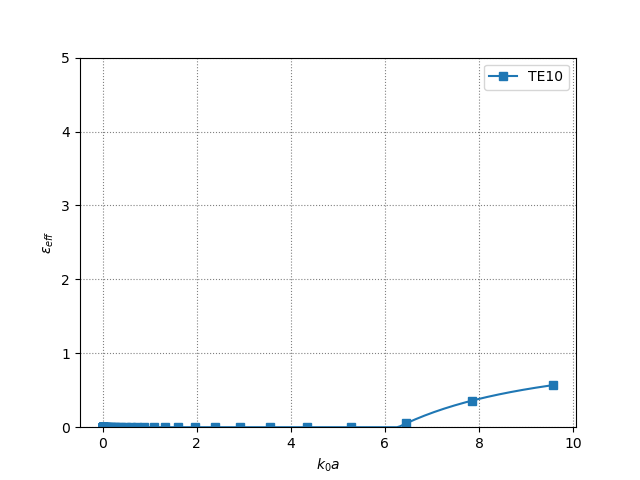

In [107]:
n = 1 # Mode number

# Plotting the dispersion diagram (as in the paper)

fig, ax = plt.subplots()

ax.plot(k0[:, 0]*a, eps_eff[:, n], marker = "s", markevery=20, label =f"TE{n}0")
# ax.plot(k0*a, eps_eff, marker = "s", markevery=20, label =f"TE{n}0")
ax.set_ylabel('$\epsilon_{eff}$')
ax.set_xlabel('$k_0 a$')

ax.set_ylim(0, 5)

ax.grid(True, color='gray', linestyle=':')
ax.legend()

plt.show()


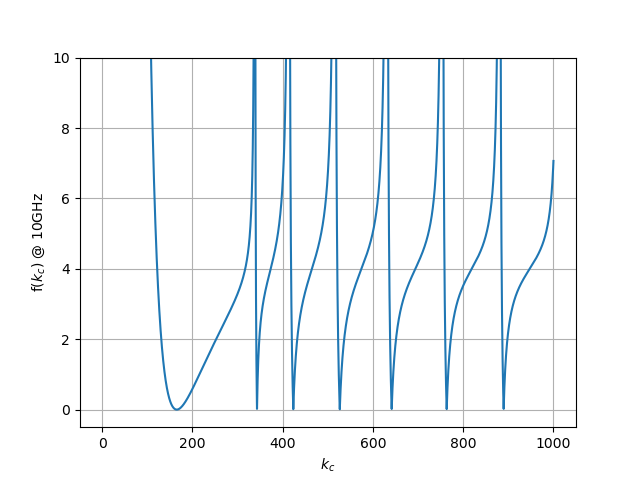

Indexes of zeros: [1643 1649 3425 4230 5261 6412 7632 8895]


In [105]:
# For m > 0

a = 22.86e-3 # Long side of waveguide
b = 10.16e-3 # Short side of waveguide
# zt = 0
zt = -1j*2 # Why negative?
zz = 0

freq = 10e9
omega = 2*np.pi*freq

# Testing the root finding
# The dispersion equation (64)
def f_of_kc(kc):

    k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)

    m = 1
    ky = m*np.pi/b
    kx = np.sqrt(kc**2-ky**2, dtype = complex)
    gamma = np.sqrt(kc**2-k0**2, dtype = complex)

    X = np.exp(-1j*2*kx*a, dtype = complex)
    
    K0xc = k0*kx/kc**2
    Kzyc = gamma*ky/kc**2

    f = np.abs(
        2*Kzyc**2*zz*(-zt+(X+1)/(1-X)*K0xc*(zz*zt+1)-K0xc**2*zz)
        + (Kzyc**4+K0xc**4)*zz**2-2*K0xc**3*(X+1)/(1-X)*zz*(zz*zt+1)
        + K0xc**2*(1+(zz*zt)**2+4*((X+1)/(1-X))**2*zz*zt)
        - 2*K0xc*(X+1)/(1-X)*zt*(1+zz*zt)
        + zt**2
        )

    return f

# Plotting

x = np.linspace(1, 1000, 10000)
fig, ax = plt.subplots()
ax.plot(x, f_of_kc(x))

ax.set_ylabel("f($k_c$) @ 10GHz")
ax.set_xlabel("$k_c$")

ax.set_ylim(-0.5, 10)
plt.grid(True)
plt.show()

# Find the zeros as peaks: n.b. The "-" is mandatory, since it defines as peaks
# the zeros (thanks to the abs)
kcs = find_peaks(-f_of_kc(x)) 

# The idexes of the zeros are:
print(f'Indexes of zeros: {kcs[0]}')

# Add to the plot to see
for i in kcs[0]:
    ax.scatter(x[i], f_of_kc(x)[i])

# n.b. I find only one zero... so there are no higer order modes?

In [103]:
# Multiple zeros finding
# Let's suppose I want to find a certain number of zeros of my function

def find_n_zeros(f, n, eps1, eps2, strt_guess=1):
    
    # Array to store my data
    root = float(fsolve(f, strt_guess))
    roots = [root]

    cntr = 0

    while len(roots) < n:
        cntr = cntr + 1
        new_guess = roots[-1] + cntr*eps1
        
        new_root = float(fsolve(f, new_guess))
        
        if new_root-roots[-1] > eps2:
            cntr = 0
            roots.append(new_root)

    return roots

print(find_n_zeros(f_of_kc, 5, 1, 10))

# Multiple zeros finding
# Let's suppose I want to find a certain number of zeros of my function

def find_n_peaks(f, n, eps1, eps2, strt_guess=1):
    
    # Array to store my data
    root = float(fsolve(f, strt_guess))
    roots = [root]

    cntr = 0

    while len(roots) < n:
        cntr = cntr + 1
        new_guess = roots[-1] + cntr*eps1
        
        new_root = float(fsolve(f, new_guess))
        
        if new_root-roots[-1] > eps2:
            cntr = 0
            roots.append(new_root)

    return roots

print(find_n_zeros(f_of_kc, 5, 1, 10))

[165.1020546229877, 343.2186600338007, 423.58903739193875, 526.5980057384814, 641.5766602059122]


In [104]:
# For m = 0
freq = np.geomspace(1e6, 2e10, 1001)
omega = 2*np.pi*freq

kc = np.zeros_like(omega)

for idx, w in enumerate(omega):

    # I have to define the function again, otherwise it does not recognize omega
    # The dispersion equation (64)
    def f_of_kc(kc):

        k0 = w*np.sqrt(sc.epsilon_0*sc.mu_0)

        m = 1
        ky = m*np.pi/b
        kx = np.sqrt(kc**2-ky**2, dtype = complex)
        gamma = np.sqrt(kc**2-k0**2, dtype = complex)

        X = np.exp(-1j*2*kx*a, dtype = complex)
        
        K0xc = k0*kx/kc**2
        Kzyc = gamma*ky/kc**2

        f = np.abs(
            2*Kzyc**2*zz*(-zt+(X+1)/(1-X)*K0xc*(zz*zt+1)-K0xc**2*zz)
            + (Kzyc**4+K0xc**4)*zz**2-2*K0xc**3*(X+1)/(1-X)*zz*(zz*zt+1)
            + K0xc**2*(1+(zz*zt)**2+4*((X+1)/(1-X))**2*zz*zt)
            - 2*K0xc*(X+1)/(1-X)*zt*(1+zz*zt)
            + zt**2
            )

        return f
    
    root = fsolve(f_of_kc, 1)
    kc[idx] = root

# Very bad, instead of checking for all the roots of the equation, we just assume they are integer multiples
# Not nice.
n = 1 # Mode number
kc = np.array(kc)*(n)

k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)

gamma = np.sqrt(kc**2 - k0**2, dtype=complex)

eps_eff = (np.imag(gamma)/k0)**2


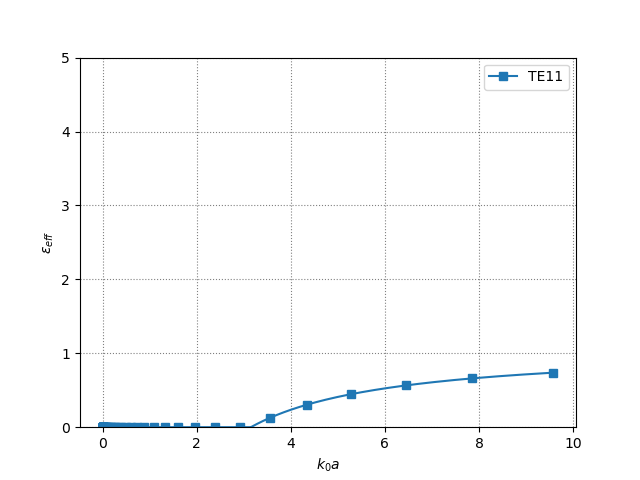

In [105]:
# Plotting the dispersion diagram (as in the paper)

fig, ax = plt.subplots()

ax.plot(k0*a, eps_eff, marker = "s", markevery=20, label = "TE11")
ax.set_ylabel('$\epsilon_{eff}$')
ax.set_xlabel('$k_0 a$')

ax.set_ylim(0, 5)

ax.grid(True, color='gray', linestyle=':')
ax.legend()

plt.show()


In [120]:
import pandas as pd
# Let's build a matrix where every element is an array of eps_eff

# For the mode TEnm
# Rows go with n
# Columns go with m

freq = np.geomspace(1e6, 2e10, 101)
omega = 2*np.pi*freq

# Starting with index m = 0:

# kc = np.zeros_like(omega)
kc = np.zeros((len(omega),5))

for idx, w in enumerate(omega):

    # I have to define the function again, otherwise it does not recognize omega
    # The dispersion equation (64)
    def f_of_kc(kc):

        k0 = w*np.sqrt(sc.epsilon_0*sc.mu_0)

        X = np.exp(-1j*2*kc*a, dtype = complex)

        f = np.abs(zt**2*(1-X) - 2*k0/kc*zt*(1+X) + (k0/kc)**2 * (1-X))
        
        return f
    
    root = find_n_zeros(f_of_kc, 5, 1, 20)
    kc[idx,:] = root

kc = pd.DataFrame(kc)
print(kc)

k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)

eps_eff = np.zeros((len(omega),5))
# gamma = np.sqrt(kc**2 - k0**2, dtype=complex)
for idx in range(len(kc.iloc[0,:])):
    gamma = np.sqrt(kc.iloc[:,idx]**2 - k0**2, dtype=complex)
    eps_eff[:,idx] = (np.imag(gamma)/k0)**2



            0        1         2           3           4
0    137.4275  274.855  412.2825  549.710001  687.137501
1    137.4275  274.855  412.2825  549.710001  687.137501
2    137.4275  274.855  412.2825  549.710001  687.137501
3    137.4275  274.855  412.2825  549.710001  687.137501
4    137.4275  274.855  412.2825  549.710001  687.137501
..        ...      ...       ...         ...         ...
96   137.4275  274.855  412.2825  549.710001  687.137501
97   137.4275  274.855  412.2825  549.710001  687.137501
98   137.4275  274.855  412.2825  549.710001  687.137501
99   137.4275  274.855  412.2825  549.710001  687.137501
100  137.4275  274.855  412.2825  549.710001  687.137501

[101 rows x 5 columns]


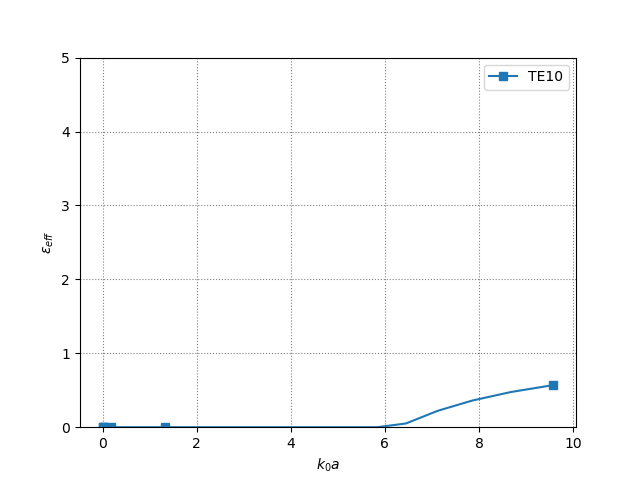

In [121]:
# Plotting the dispersion diagram (as in the paper)

eps_eff = pd.DataFrame(eps_eff)

fig, ax = plt.subplots()

ax.plot(k0*a, eps_eff.iloc[:,1], marker = "s", markevery=20, label = "TE10")
ax.set_ylabel('$\epsilon_{eff}$')
ax.set_xlabel('$k_0 a$')

ax.set_ylim(0, 5)

ax.grid(True, color='gray', linestyle=':')
ax.legend()

plt.show()


In [145]:
from sympy import *
from sympy import init_printing

In [192]:
X, Z_0, Z_z, Z_t, k_c, k_0, k_x, k_y, gamma, beta = symbols('X Z_0 Z_z Z_t k_c k_0 k_x k_y gamma beta')
kzyc, k0xc = symbols('kzyc k0xc')
init_printing() 

kH = (1-X)/(2*X)*1/(Z_t*k_c**2)*(gamma*k_y*beta+Z_0*k_0*k_x)-(X+1)/(2*X)
kE = (1-X)/(2*X)*Z_z/(beta*k_c**2)*(gamma*k_y+k_0*k_x/Z_0 * beta)-(X+1)/(2*X)

#Kzyc = gamma*k_y/k_c**2
#K0xc = k_0*k_x/k_c**2

# Substitute expressions like gamma*ky/kc**2 with Kzyc
kH = kH.expand().subs(gamma*k_y/k_c**2, kzyc)
kH = kH.expand().subs(k_0*k_x/k_c**2, k0xc)
kE = kE.expand().subs(gamma*k_y/k_c**2, kzyc)
kE = kE.expand().subs(k_0*k_x/k_c**2, k0xc)

eq44 = Z_0*k_c**2*beta*(1+kE)+ gamma*k_y*Z_0*Z_z*(1+kH) + k_0*k_x*Z_z*beta*(1-kE)

expression1 = solve(eq44, beta)
expression1 = factor(expression1)
numerator = numer(expression1[0])/k_c**2
numerator = numerator.expand().subs(k_0*k_x/k_c**2, k0xc)
numerator = numerator.expand().subs(gamma*k_y/k_c**2, kzyc)
numerator.factor()

denominator = denom(expression1[0])/k_c**2
denominator = denominator.expand().subs(k_0*k_x/k_c**2, k0xc)
denominator = denominator.expand().subs(gamma*k_y/k_c**2, kzyc)
denominator.factor()

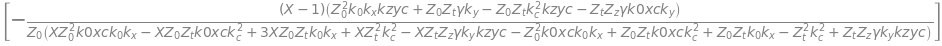

In [184]:
X, Z_0, Z_z, Z_t, k_c, k_0, k_x, k_y, gamma, alpha = symbols('X Z_0 Z_z Z_t k_c k_0 k_x k_y gamma alpha')
kzyc, k0xc = symbols('kzyc k0xc')
init_printing() 

kH = (1-X)/(2*X)*1/(Z_t*k_c**2*alpha)*(gamma*k_y+Z_0*k_0*k_x*alpha)-(X+1)/(2*X)
kE = (1-X)/(2*X)*Z_z/(k_c**2)*(gamma*k_y*alpha+k_0*k_x/Z_0)-(X+1)/(2*X)

#Kzyc = gamma*k_y/k_c**2
#K0xc = k_0*k_x/k_c**2

# Substitute expressions like gamma*ky/kc**2 with Kzyc
kH = kH.expand().subs(gamma*k_y/k_c**2, kzyc)
kH = kH.expand().subs(k_0*k_x/k_c**2, k0xc)
kE = kE.expand().subs(gamma*k_y/k_c**2, kzyc)
kE = kE.expand().subs(k_0*k_x/k_c**2, k0xc)

eq41 = Z_t*k_c**2*alpha*(1+kH)+ gamma*k_y*(1+kE) + Z_0*k_0*k_x*alpha*(1-kH)

expression1 = solve(eq41, alpha)
expression1 = factor(expression1)



In [198]:
X, Z_0, Z_z, Z_t, k_c, k_0, k_x, k_y, gamma, beta = symbols('X Z_0 Z_z Z_t k_c k_0 k_x k_y gamma beta')

init_printing() 

M = Matrix([
    [gamma*k_y, gamma*k_y, Z_t*k_c**2-Z_0*k_0*k_x, Z_t*k_c**2+Z_0*k_0*k_x],
    [gamma*k_y*X, gamma*k_y, -(Z_t*k_c**2+Z_0*k_0*k_x)*X, -Z_t*k_c**2+Z_0*k_0*k_x],
    [-Z_z*k_0*k_x+k_c**2*Z_0, Z_z*k_0*k_x+k_c**2*Z_0, Z_z*gamma*k_y*Z_0, Z_z*gamma*k_y*Z_0],
    [-(Z_z*k_0*k_x+k_c**2*Z_0)*X, Z_z*k_0*k_x-k_c**2*Z_0, Z_z*gamma*k_y*Z_0*X, Z_z*gamma*k_y*Z_0]
])

gamma_p, gamma_m, psi_p, psi_m = symbols('gamma_p gamma_m psi_p psi_m')

system = Eq(M * Matrix([gamma_p, gamma_m, psi_p, psi_m]), Matrix([0, 0, 0, 0]))

# Solve the system
solution = solve(system, gamma_p, gamma_m, psi_p, psi_m)


In [ ]:
import numpy as np

def solution(U):
    # find the eigenvalues and eigenvector of U(transpose).U
    e_vals, e_vecs = np.linalg.eig(np.dot(U.T, U))  
    # extract the eigenvector (column) associated with the minimum eigenvalue
    return e_vecs[:, np.argmin(e_vals)] 

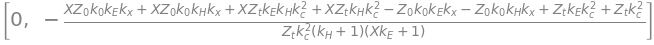

In [13]:
# Try to find Am and Bm from (41) and (42)
from sympy import *
from sympy import init_printing

A_m, B_m, k_E, k_H, X, Z_0, Z_z, Z_t, k_c, k_0, k_x, k_y, gamma, beta = symbols('A_m B_m k_E k_H X Z_0 Z_z Z_t k_c k_0 k_x k_y gamma beta')
kzyc, k0xc = symbols('kzyc k0xc')
init_printing() 

expr41 = Z_t*k_c**2*B_m*(1+k_H) + gamma*k_y*A_m*(1+k_E) + Z_0*k_0*k_x*B_m*(1-k_H)
expr42 = -Z_t*k_c**2*B_m*(1+k_H*X) + gamma*k_y*A_m*(1+k_E*X) + Z_0*k_0*k_x*B_m*(1-k_H*X)

exprBm = -Z_t*k_c**2*B_m*(1+k_H*X) + gamma*k_y*(-B_m*(Z_t*k_c**2*B_m*(1+k_H)+Z_0*k_0*k_x*(1-k_H)))/(gamma*k_y*(1+k_E))*(1+k_E*X) + Z_0*k_0*k_x*B_m*(1-k_H*X)

Bm = solve(exprBm, B_m)
Bm = factor(Bm)
Bm

### Computing field distributions for the TE10 in the WR90 @ 10GHz

c:\Users\leona\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\leona\AppData\Local\Temp\ipykernel_27544\1827609712.py:53: RuntimeWarning: divide by zero encountered in true_divide
  kH = (1-X)/(2*X)*1/(zt*Z0*kc**2*alpha)*(gamma*ky+Z0*k0*kx*alpha)-(X+1)/(2*X)
C:\Users\leona\AppData\Local\Temp\ipykernel_27544\1827609712.py:53: RuntimeWarning: invalid value encountered in multiply
  kH = (1-X)/(2*X)*1/(zt*Z0*kc**2*alpha)*(gamma*ky+Z0*k0*kx*alpha)-(X+1)/(2*X)
C:\Users\leona\AppData\Local\Temp\ipykernel_27544\1827609712.py:56: RuntimeWarning: invalid value encountered in true_divide
  Bm = - (1/zt*k0xc*(kE+kH)*(X-1)+(kE+1)*(X*kH+1))/((kH+1)*((X*kE+1)))


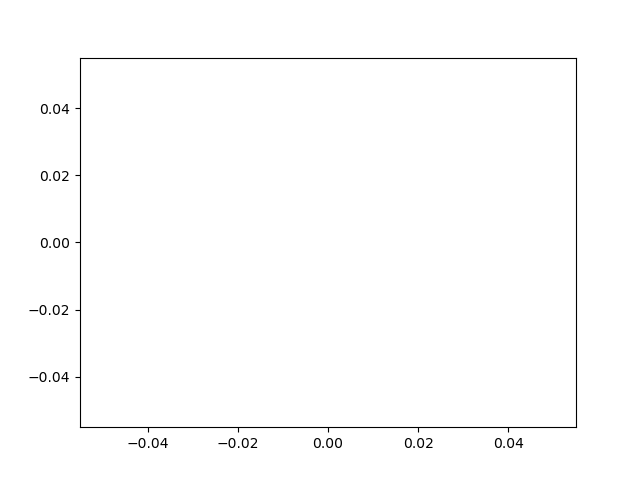

In [27]:
# For m = 1, we are trying with TE11

# The waveguide (WR90)
a = 22.86e-3 # Long side of waveguide
b = 10.16e-3 # Short side of waveguide

# The FSS (at the moment PEC)
zz = 1e-5
zt = 1e-5

# Computation only at one frequency
freq = 10e9 # Hz
omega = 2*np.pi*freq

# The dispersion equation (64)
def f_of_kc(kc):

    k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)
    X = np.exp(-1j*2*kc*a, dtype = complex)
    
    f = np.abs(zt**2*(1-X) - 2*k0/kc*zt*(1+X) + (k0/kc)**2 * (1-X))

    return f

# Plotting the function to visually see the position of the zeros
"""
x = np.linspace(1, 1000, 10000)
fig, ax = plt.subplots()
ax.plot(x, f_of_kc(x))

plt.show()
"""

k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)
m = 1
ky = m*np.pi/b # m = 0

# Finding kc, this only finds one root...
kc = fsolve(f_of_kc, 0.1)
kx = np.sqrt(kc**2 - ky**2, dtype=complex)

# Of the parameters we need (gamma, alpha, kx, KE, KH, Am, Bm)
gamma = np.sqrt(kc**2 - k0**2, dtype=complex)

k0xc = k0*kx/kc**2
kzyc = gamma*ky/kc**2
X = np.exp(-1j*2*kc*a, dtype = complex)
Z0 = np.sqrt(sc.mu_0/sc.epsilon_0)

# Eq. (48)
alpha = 0#(1+k0xc*zz*(k0xc*zz-2*(X+1)/(1-X))-kzyc**2*zz/zt)/(k0xc*kzyc*zz*Z0*(1/zt-zz))

kH = (1-X)/(2*X)*1/(zt*Z0*kc**2*alpha)*(gamma*ky+Z0*k0*kx*alpha)-(X+1)/(2*X)
kE = (1-X)/(2*X)*zz*Z0/(kc**2)*(gamma*ky*alpha+k0*kx/Z0)-(X+1)/(2*X)

Bm = - (1/zt*k0xc*(kE+kH)*(X-1)+(kE+1)*(X*kH+1))/((kH+1)*((X*kE+1)))
Am = - Z0*Bm * (zt*kc**2*(kH+1)+k0*kx*(1-kH))/(gamma*ky*(1+kE))


x = np.linspace(0,a,100)
y = 0

Ey = -(gamma*ky*Am*(np.exp(1j*kx*x, dtype = complex)+kE*np.exp(-1j*kx*x, dtype = complex))+Z0*k0*kx*Bm*(np.exp(1j*kx*x, dtype = complex)-kH*np.exp(-1j*kx*x, dtype = complex)))*cos(ky*y)/kc**2


fig, ax = plt.subplots()
ax.plot(x, Ey)

plt.show()

# Looks like this is not working, we should go to another reference, where we solve the matrix...

In [ ]:
# Here we follow [Benedikt Byrne. “Etude et conception de guides d’onde et 
# d’antennes cornets `a m ́etamat ́eriaux”. PhD thesis. Nov. 2016. url: https://oatao.univ-toulouse.fr/172

# 1) In principio, la prima cosa da fare sarebbe modificare lo script così che gli do io m ed n e lui sa che parametri deve scegliere.
# 2) Risolviamo il sistema di equazioni per avere i 4 parameteri
# 3) Calcoliamo i campi ()